<a href="https://colab.research.google.com/github/navojitbasu/datascienceprojects/blob/main/Project_11_Medical_Insurance_Cost_Prediction_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [2]:
# Loading the data from csv to Pandas Data Frame

insurance_data = pd.read_csv('/insurance.csv')

In [3]:
# First 5rows of the Data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Number of rows & columns
insurance_data.shape

(1338, 7)

In [6]:
#Getting some information about the Dataset

insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Checking the Missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical Features

- Sex
- Smoker
- Region

Data Analysis

In [8]:
#Statistical Measures of the Dataset

insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


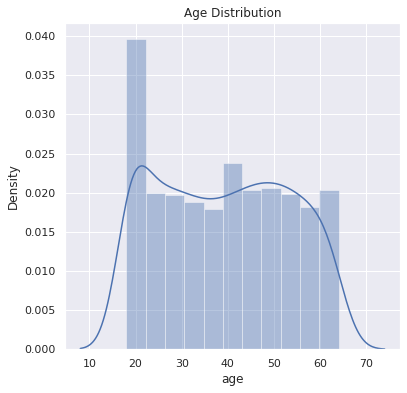

In [9]:
#Distribution of Age value

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()


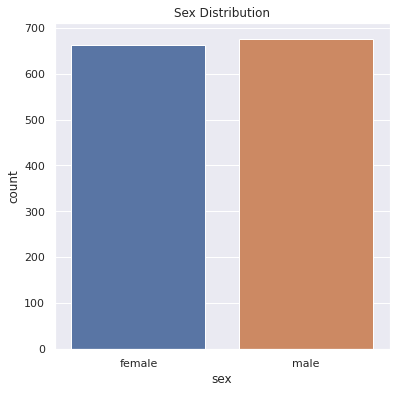

In [10]:
#Distribution of Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


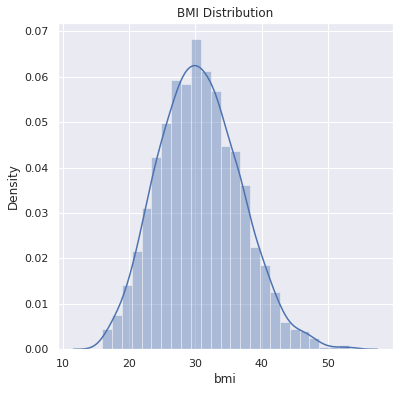

In [12]:
#Distribution of BMI

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()



Normal BMI Range ---> 18.5 to 24.9

In [13]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

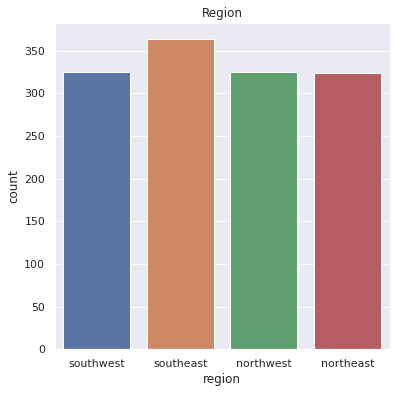

In [16]:
#Region Column Distribution

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('Region')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


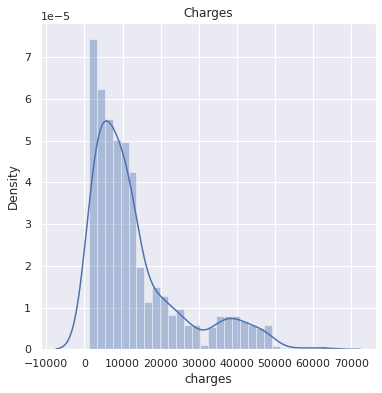

In [18]:
#Charges Value Distribution

plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charges')
plt.show()

Countplot() ---> Used for Categorical Value

Distplot() ---> Used for Numerical Value

Data Preprocessing

Encoding the Categorical Features

In [23]:
#Encoding sex column
insurance_data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#Encoding Smoker column
insurance_data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#Encoding Region column
insurance_data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

Splitting the Features & Target

In [24]:
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

In [25]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [26]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training & Testing Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [28]:
#Loading the Linear Regression model()

regressor = LinearRegression()

In [29]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [30]:
#Prediction On Training Data

training_data_prediction = regressor.predict(X_train)


In [31]:
#R Square Value on Training Data

r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Value: ',r2_train)

R Squared Value:  0.751505643411174


In [32]:
#Prediction on Test Data

test_data_prediction = regressor.predict(X_test)

In [33]:
#R Sqaured value on Test Data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared Value on Test Data: ', r2_test)

R Squared Value on Test Data:  0.7447273869684076


Building a Predictive System

In [36]:
input_data = (34,1,31.92,1,0,2)

# Changing Input Data which is a tuple to Numpy Array

input_data_as_numpy_array = np.asarray(input_data)

#Reshape the array
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
#print(input_data_reshape)


In [37]:
prediction = regressor.predict(input_data_reshape)
print(prediction)

[31490.51146681]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
print("The Insurance cost in USD: ", prediction[0])

The Insurance cost in USD:  31490.511466805143
